# 读取数据

In [40]:
import numpy as np
import pandas as pd

data=pd.read_csv('./data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA数据探索

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 10 Patch objects>)

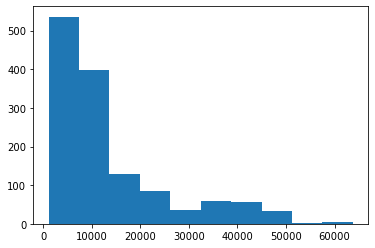

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(data['charges'])

(array([ 46., 105., 101., 155., 198., 283., 156., 123., 115.,  56.]),
 array([ 7.02364666,  7.42758805,  7.83152943,  8.23547082,  8.63941221,
         9.0433536 ,  9.44729498,  9.85123637, 10.25517776, 10.65911914,
        11.06306053]),
 <a list of 10 Patch objects>)

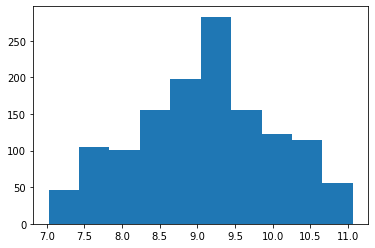

In [42]:
plt.hist(np.log1p(data['charges']))

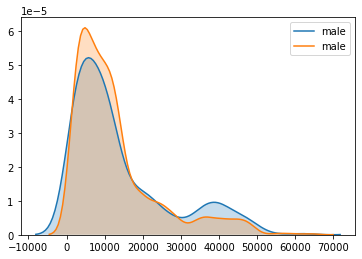

In [43]:
import seaborn as sns

sns.kdeplot(data.loc[data.sex=='male','charges'], shade=True, label='male')
sns.kdeplot(data.loc[data.sex=='female','charges'], shade=True, label='male')

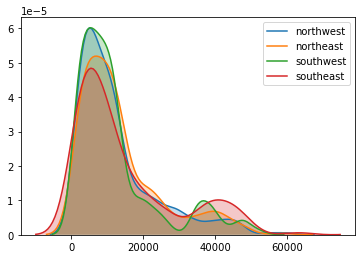

In [44]:
sns.kdeplot(data.loc[data.region=='northwest', 'charges'], shade=True, label='northwest')
sns.kdeplot(data.loc[data.region=='northeast', 'charges'], shade=True, label='northeast')
sns.kdeplot(data.loc[data.region=='southwest', 'charges'], shade=True, label='southwest')
sns.kdeplot(data.loc[data.region=='southeast', 'charges'], shade=True, label='southeast')

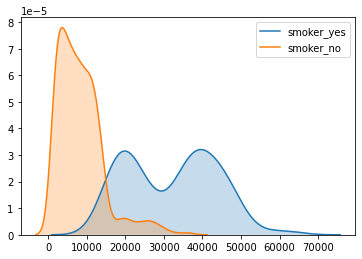

In [45]:
sns.kdeplot(data.loc[data.smoker=='yes', 'charges'], shade=True, label='smoker_yes')
sns.kdeplot(data.loc[data.smoker=='no', 'charges'], shade=True, label='smoker_no')

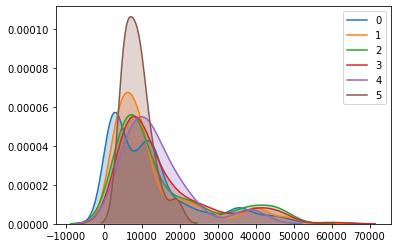

In [46]:
sns.kdeplot(data.loc[data.children==0, 'charges'], shade=True, label='0')
sns.kdeplot(data.loc[data.children==1, 'charges'], shade=True, label='1')
sns.kdeplot(data.loc[data.children==2, 'charges'], shade=True, label='2')
sns.kdeplot(data.loc[data.children==3, 'charges'], shade=True, label='3')
sns.kdeplot(data.loc[data.children==4, 'charges'], shade=True, label='4')
sns.kdeplot(data.loc[data.children==5, 'charges'], shade=True, label='5')

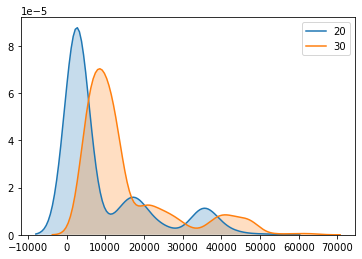

In [47]:
sns.kdeplot(data.loc[data.age<30, 'charges'], shade=True, label='20')
sns.kdeplot(data.loc[data.age>=30, 'charges'], shade=True, label='30')

# 特征工程

In [48]:
data=data.drop(['region', 'sex'], axis=1)
data.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520


In [49]:
def greater(df, bmi, num_child):
    df['bmi']=('over' if df['bmi'] >= bmi else 'under')
    df['children']=('no' if df['children']==num_child else 'yes')
    return df

data=data.apply(greater, axis=1, args=(30,0,))  # 已经改变了原data，不能再次执行
data.head()

,age,bmi,children,smoker,charges
0,19,under,no,yes,16884.92400
1,18,over,yes,no,1725.55230
2,28,over,yes,no,4449.46200
3,33,under,no,no,21984.47061
4,32,under,no,no,3866.85520


In [56]:
data=pd.get_dummies(data)  # get_dummies()函数可以将非数值数据做离散化
data.head()

,age,charges,bmi_over,bmi_under,children_no,children_yes,smoker_no,smoker_yes
0,19,16884.92400,0,1,1,0,0,1
1,18,1725.55230,1,0,0,1,1,0
2,28,4449.46200,1,0,0,1,1,0
3,33,21984.47061,0,1,1,0,1,0
4,32,3866.85520,0,1,1,0,1,0


In [59]:
x=data.drop('charges', axis=1)
y=data['charges']
x.fillna(0, inplace=True)
y.fillna(0, inplace=True)
x.tail()

,age,bmi_over,bmi_under,children_no,children_yes,smoker_no,smoker_yes
1333,50,1,0,0,1,1,0
1334,18,1,0,1,0,1,0
1335,18,1,0,1,0,1,0
1336,21,0,1,1,0,1,0
1337,61,0,1,1,0,0,1


In [60]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

In [69]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler(with_mean=True, with_std=True)
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)  # 归一化
x_test_scaled=scaler.transform(x_test)

In [70]:
from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=2, include_bias=False)  # 升维
x_train_poly=poly_features.fit_transform(x_train_scaled)
x_test_poly=poly_features.fit_transform(x_test_scaled)

# 模型训练

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

line_reg=LinearRegression()
ridg_reg=Ridge(alpha=10)
grad_reg=GradientBoostingRegressor()

In [72]:
line_reg.fit(x_train_poly, np.log1p(y_train))  # np.log1p()是优化后的np.log()，对数据做正态分布
ridg_reg.fit(x_train_poly, np.log1p(y_train))
grad_reg.fit(x_train_poly, np.log1p(y_train))

GradientBoostingRegressor()

In [73]:
y_line_predict=line_reg.predict(x_test_poly)
y_ridg_predict=ridg_reg.predict(x_test_poly)
y_grad_predict=grad_reg.predict(x_test_poly)

# 模型评估

In [74]:
from sklearn.metrics import mean_squared_error

line_train_error=np.sqrt(mean_squared_error(y_true=np.log1p(y_train), y_pred=line_reg.predict(x_train_poly)))  # 训练集误差
line_test_error =np.sqrt(mean_squared_error(y_true=np.log1p(y_test), y_pred=y_line_predict))  # 测试集误差

ridge_train_error=np.sqrt(mean_squared_error(y_true=np.log1p(y_train), y_pred=ridg_reg.predict(x_train_poly)))  # 训练集误差
ridge_test_error =np.sqrt(mean_squared_error(y_true=np.log1p(y_test), y_pred=y_ridg_predict))  # 测试集误差

grad_train_error=np.sqrt(mean_squared_error(y_true=np.log1p(y_train), y_pred=grad_reg.predict(x_train_poly)))  # 训练集误差
grad_test_error =np.sqrt(mean_squared_error(y_true=np.log1p(y_test), y_pred=y_grad_predict))  # 测试集误差

line_train_error, line_test_error, ridge_train_error, ridge_test_error, grad_train_error, grad_test_error

(0.3729679443835074,
 0.39615516080844154,
 0.3729987730175761,
 0.3959803939922765,
 0.3463753755923066,
 0.4043794189394709)

In [75]:
line_train_error=np.sqrt(mean_squared_error(y_true=y_train, y_pred=np.exp(line_reg.predict(x_train_poly))))
line_test_error =np.sqrt(mean_squared_error(y_true=y_test, y_pred=np.exp(y_line_predict)))

ridge_train_error=np.sqrt(mean_squared_error(y_true=y_train, y_pred=np.exp(ridg_reg.predict(x_train_poly))))
ridge_test_error =np.sqrt(mean_squared_error(y_true=y_test, y_pred=np.exp(y_ridg_predict)))

grad_train_error=np.sqrt(mean_squared_error(y_true=y_train, y_pred=np.exp(grad_reg.predict(x_train_poly))))
grad_test_error =np.sqrt(mean_squared_error(y_true=y_test, y_pred=np.exp(y_grad_predict)))

line_train_error, line_test_error, ridge_train_error, ridge_test_error, grad_train_error, grad_test_error

(4478.399727088286,
 4981.143527022727,
 4480.421387733772,
 4997.319303707002,
 4047.806103612094,
 4987.1360023992665)